<span style="font-family: 'Tahoma'; font-weight: bold; font-size: 16px;">EARLY GROWTH PATTERNS IN INFANTS: ANALYZING BIRTH LENGTH, WEIGHT, AND HEAD CIRCUMFERENCE</span>


<span style="font-family: 'Tahoma'; font-weight: bold; font-size: 16px;">Description:</span>

The dataset, babies.xlsx, provides detailed measurements of birth length, weight, and head 
circumference recorded at one month of age for a cohort of 256 infants. These data points were 
collected as part of a larger population-based study aimed at understanding early growth 
patterns in newborns. The study design and data capture offer insights into early physical 
growth parameters, which can be used for both clinical assessments and broader 
epidemiological research.

<span style="font-family: 'Tahoma'; font-weight: bold; font-size: 16px;">Questions:</span>
1. Which gender of babies tends to be longer at one month of age?
2. Do male babies generally weigh more than female babies at one month old?
3. Are head circumferences larger in male babies compared to female babies?
4. Is there a gender difference in the relationship between length and weight?
5. Does one gender show greater variation in growth measurements such as length, weight, 
or head circumference?



In [81]:
#install relevant packagesfor data analysis
!pip install pandas
!pip install scipy
!pip install matplotlib
!pip install numpy
!pip install bstrap

In [82]:
#import libraries
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

# Load the dataset from an Excel file and readd the file using Pandas
df = pd.read_excel('babies.xlsx')

# Display the first few rows of the dataset to inspect the data
df.head()

,id,bweight,blength,bheadcir,gender
0,L002,3.09,50.0,33.5,Male
1,L003,3.94,50.0,35.0,Female
2,L006,3.20,49.0,36.0,Male
3,L007,2.93,51.0,31.5,Female
4,L017,3.16,49.0,34.0,Male


In [83]:
#import numpy for data cleaning 
import numpy as np 

# Using for loop, loop through each column in the dataframe to check for missing values
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

id - 0.0%
bweight - 0.0%
blength - 0.0%
bheadcir - 0.0%
gender - 0.0%


In [84]:
# Confirm data types of all columns
df.dtypes


id           object
bweight     float64
blength     float64
bheadcir    float64
gender       object
dtype: object

In [85]:
# Rename the columns for better result output
df.columns = ['id', 'Weight of Babies', 'Length of Babies', 'Head Circumference of Babies', 'Gender']

# Convert 'Gender' column to 'category' data type for better analysis
df['Gender'] = df['Gender'].astype('category')

df.dtypes
df.head()


,id,Weight of Babies,Length of Babies,Head Circumference of Babies,Gender
0,L002,3.09,50.0,33.5,Male
1,L003,3.94,50.0,35.0,Female
2,L006,3.20,49.0,36.0,Male
3,L007,2.93,51.0,31.5,Female
4,L017,3.16,49.0,34.0,Male


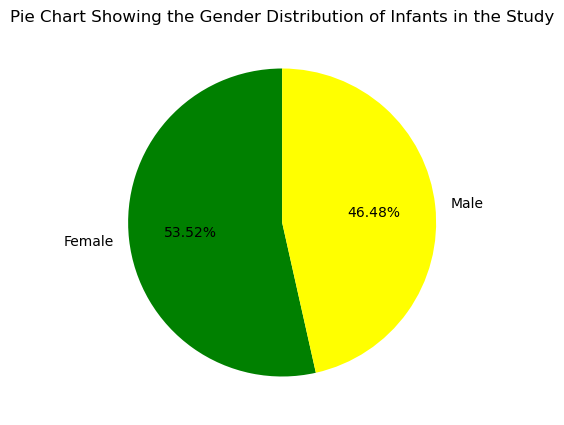

In [86]:
# Get the count of each gender in the 'Gender' column
gender_counts = df['Gender'].value_counts()

# Using pyplot from Matplotlib, create the pie chart
plt.figure(figsize=(8, 5))  # Set figure size
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.2f%%', 
        colors=['green', 'yellow'], startangle=90)

# Add Title
plt.title("Pie Chart Showing the Gender Distribution of Infants in the Study")

# Show the plot
plt.show()

<span style="font-family: 'Tahoma'; font-weight: bold; font-size: 16px;">The data set includes 256 infants of which 119 are male (46.5%) and 137 are female (53.5%).</span>

In [88]:
#Using Pandas df.describe(), calculate descritptives for this data set
descriptive_stats = df.groupby('Gender', observed = False)[['Weight of Babies', 'Length of Babies', 'Head Circumference of Babies']].describe()

# Make the statistics results more readable
descriptive_stats = descriptive_stats.transpose()

#Print the results rounded to two decimal places.
print(descriptive_stats.round(2))


Gender                              Female    Male
Weight of Babies             count  137.00  119.00
                             mean     3.53    3.44
                             std      0.43    0.33
                             min      2.71    2.70
                             25%      3.24    3.20
                             50%      3.50    3.43
                             75%      3.79    3.67
                             max      4.72    4.62
Length of Babies             count  137.00  119.00
                             mean    50.28   50.33
                             std      0.85    0.78
                             min     49.00   49.00
                             25%     49.50   50.00
                             50%     50.00   50.50
                             75%     51.00   51.00
                             max     52.00   51.50
Head Circumference of Babies count  137.00  119.00
                             mean    34.25   34.94
                             st

<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;"> According to the results:
    
Male babies have longer mean length (50.33) and head circumference (34.94) but weigh less (3.44) than female babies (50.28), (34.25), (3.53).
</p>

<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;"> Which gender of babies tends to be longer at one month of age?
    
<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;"> Do male babies generally weigh more than female babies at one month old?
<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;"> Are head circumferences larger in male babies compared to female babies?
    
    
To determine this, we compare the means of these variables of male and female babies and test for statistical significance.

We use the independent t-test because we are comparing the means of two independent groups (male vs. female).
Before applying the t-test, we check the assumptions:

- Normality: Tested using the Shapiro-Wilk test.  
- Equality of variances: Tested using Levene’s test.

If the assumptions are met, we proceed with the independent t-test to determine if the difference is statistically significant.</p>

Normality of Weight of Babies (Female): Statistics=0.983, p-value=0.094
The data for Weight of Babies Female is normally distributed


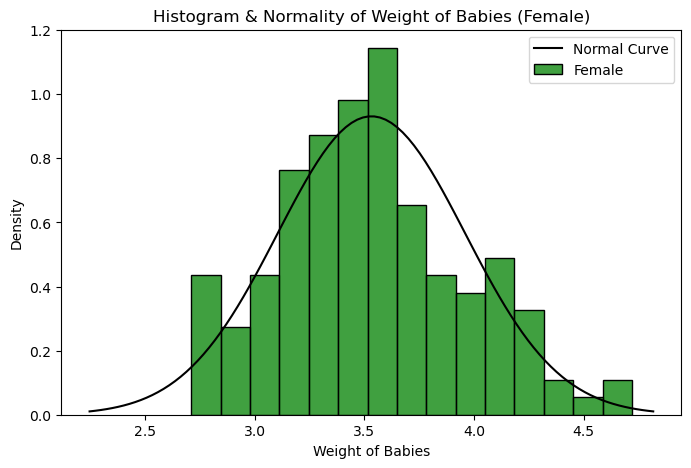

Normality of Weight of Babies (Male): Statistics=0.987, p-value=0.313
The data for Weight of Babies Male is normally distributed


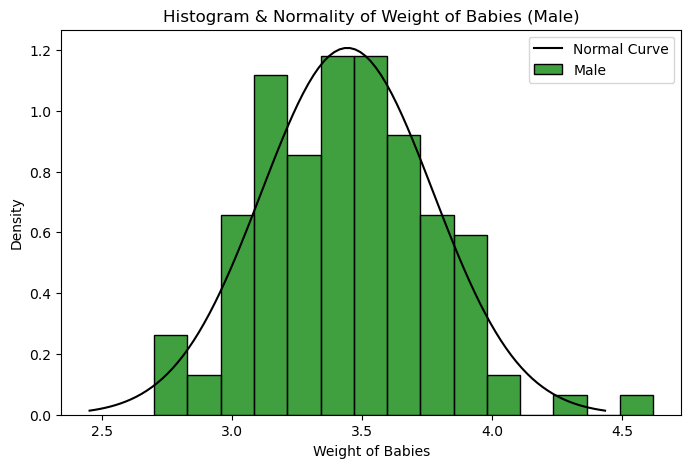

Normality of Length of Babies (Female): Statistics=0.889, p-value=0.000
The data for Length of Babies Female is not normally distributed


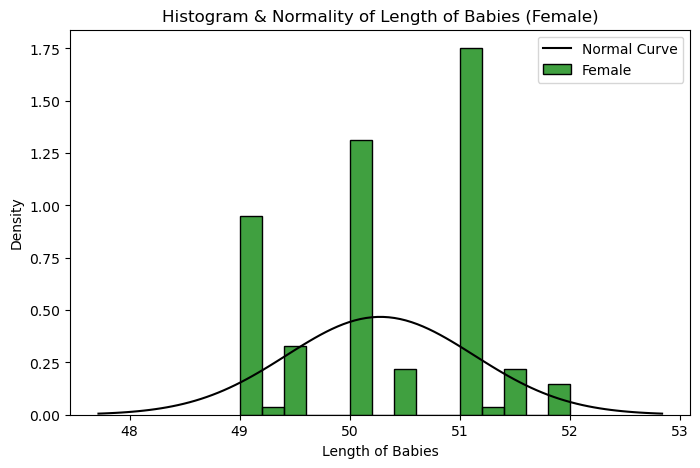

Normality of Length of Babies (Male): Statistics=0.895, p-value=0.000
The data for Length of Babies Male is not normally distributed


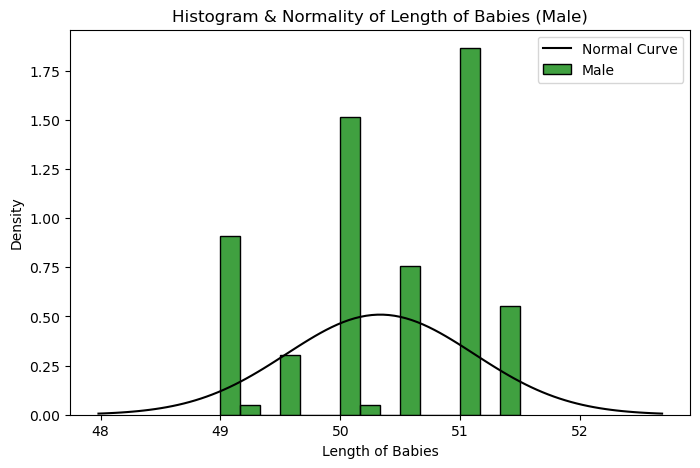

Normality of Head Circumference of Babies (Female): Statistics=0.965, p-value=0.001
The data for Head Circumference of Babies Female is not normally distributed


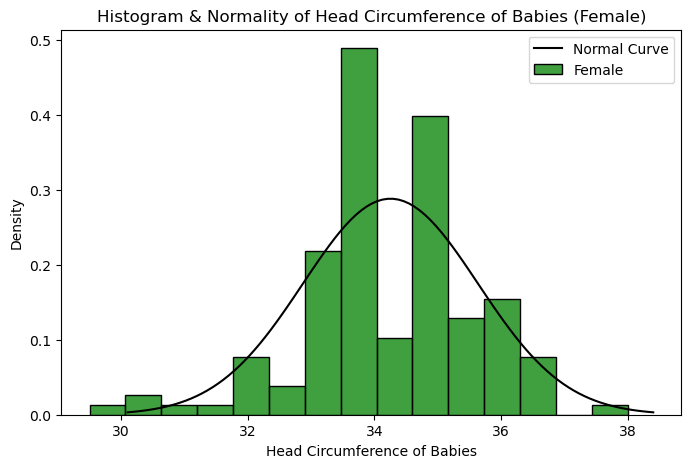

Normality of Head Circumference of Babies (Male): Statistics=0.977, p-value=0.037
The data for Head Circumference of Babies Male is not normally distributed


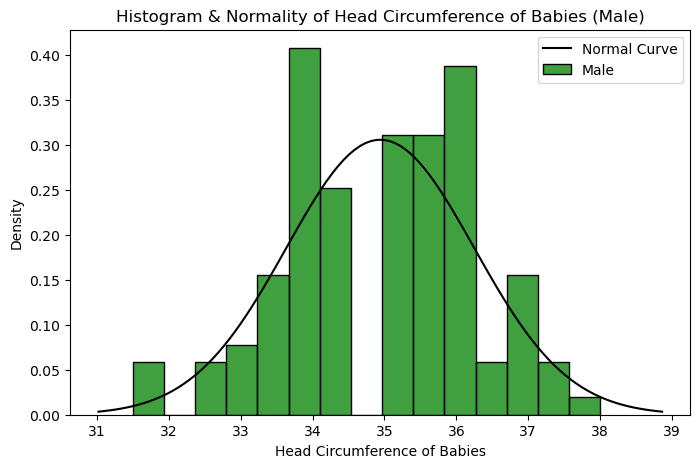

In [91]:
from scipy.stats import norm
from scipy.stats import shapiro

df = pd.read_excel('babies.xlsx')
df.columns = ['id', 'Weight of Babies', 'Length of Babies', 'Head Circumference of Babies', 'Gender']
df['Gender'] = df['Gender'].astype('category')

# create function to test for normality
def normality_tests(df, variable, group_col='Gender'):

    # loop through each gender category (Male, Female)
    for gender in df[group_col].cat.categories:
        # Select data for the given gender and variable
        data = df[df[group_col] == gender][variable].dropna()  # .dropna() removes missing values
        
        # using scipy.stats perform Shapiro-Wilk Test
        stat, p = shapiro(data)
        print(f'Normality of {variable} ({gender}): Statistics={stat:.3f}, p-value={p:.3f}')
        
        if p < 0.05:
            print(f'The data for {variable} {gender} is not normally distributed')
        else:
            print(f'The data for {variable} {gender} is normally distributed')
            
        # plot histogram with normal curve to visualise normality
        plt.figure(figsize=(8, 5))  
        sns.histplot(data, stat="density", bins=15, label=f'{gender}', color='green')
        mean, std = data.mean(), data.std()
        x = np.linspace(mean - 3*std, mean + 3*std, 100)
        plt.plot(x, norm.pdf(x, mean, std), color='black', label='Normal Curve')
        
        # format plot
        plt.title(f'Histogram & Normality of {variable} ({gender})')
        plt.xlabel(variable)
        plt.ylabel('Density')
        plt.legend()
        plt.show()

# call the function
variables = ['Weight of Babies', 'Length of Babies', 'Head Circumference of Babies']

for var in variables:
    normality_tests(df, var)

<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;">
According to the histograms and the Shapiro-Wilk test result:
    
Weight showed a normal distribution for both genders (p > 0.05). However, length and head circumference were not normally distributed (p = 0.001 for females, p = 0.037 for males) and (p < 0.001 for both genders), respectively.
</p> 
		

<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;">Does one gender show greater variation in growth measurements such as length, weight, or head circumference?</p> 

In [93]:
from scipy.stats import levene

variables = ['Weight of Babies', 'Length of Babies', 'Head Circumference of Babies']

# loop through each variable to perform Levene's test
for var in variables:
    
# using scipy.stats levene, perform Levene's test for homogeneity of variances between males and females
    stat, pvalue = levene(df[var][df['Gender'] == 'Male'],
                         df[var][df['Gender'] == 'Female'], center = 'mean')
    
    # print the p-value for the test of equal variances for each variable
    print(f"Levene's test p-value for {var}: {pvalue:.3f}")
    
    # Check the p-value to determine if equal variances can be assumed
    if pvalue > 0.05:
        print('Equal variances assumed.')
    else: 
        print('Equal variances not assumed.')
   

Levene's test p-value for Weight of Babies: 0.009
Equal variances not assumed.
Levene's test p-value for Length of Babies: 0.133
Equal variances assumed.
Levene's test p-value for Head Circumference of Babies: 0.613
Equal variances assumed.


<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;">
According to Levene’s test results:
    
Length and head circumference have equal variances between male and female babies (p = 0.133 and p = 0.613, respectively), while weight does not (p = 0.009), indicating unequal variances.

This suggests that female babies showed greater variability in weight, whereas the variation in length and head circumference was similar across genders.

</p> 
		

<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;">
Despite not meeting the assumptions of normality and equal variances,
    
a parametric independent t-test is conducted, bootstrapping is used to estimate confidence intervals for a more robust analysis.
</p> 

In [96]:
from scipy import stats
from bstrap import bootstrap, boostrapping_CI

# Variables to analyze
variables = ['Weight of Babies', 'Length of Babies', 'Head Circumference of Babies']
male_babies = df[df['Gender'] == 'Male']
female_babies = df[df['Gender'] == 'Female']

# create function to perform bootstrapping and t-test
def bootstrap_and_ttest(variables, nbr_runs=1000):
    
    for variable in variables:
        male_data = pd.DataFrame(male_babies[variable], columns=[variable])
        female_data = pd.DataFrame(female_babies[variable], columns=[variable])
        
        # Perform bootstrapping for more robust analysis due to non normal distribution
        # Calculate the bootstrap confidence intervals
        male_CI = boostrapping_CI(np.mean, male_data, nbr_runs=nbr_runs)
        female_CI = boostrapping_CI(np.mean, female_data, nbr_runs=nbr_runs)
        
        print(f"Bootstrap CI for {variable} (Male): [{male_CI['metric_ci_lb']:.2f}, {male_CI['metric_ci_ub']:.3f}]") 
        print(f"Bootstrap CI for {variable} (Female): [{female_CI['metric_ci_lb']:.2f}, {female_CI['metric_ci_ub']:.3f}]")

        # Perform Independent t-test to compare the means between male and female
        t_stat_list, p_value_list = stats.ttest_ind(male_data.dropna(), female_data.dropna())
        
        # extract the t-statistic and p-value from the arrays returned by ttest_ind
        p_value = p_value_list[0]
        t_stat = t_stat_list[0]
        
        # determine whether the difference between means is statistically significant
        if p_value < 0.05:
            significance = "Significant"
        else:
            significance = "Not Significant"
            
        # print the t-test results along with the significance of the result
        print(f"T-test for {variable}: t-stat = {t_stat:.3f}, p-value = {p_value:.3f} ({significance})")
          
# run the function on the list of variables to analyze        
bootstrap_and_ttest(variables)


Bootstrap CI for Weight of Babies (Male): [3.40, 3.493]
Bootstrap CI for Weight of Babies (Female): [3.47, 3.589]
T-test for Weight of Babies: t-stat = -1.832, p-value = 0.068 (Not Significant)
Bootstrap CI for Length of Babies (Male): [50.22, 50.453]
Bootstrap CI for Length of Babies (Female): [50.16, 50.397]
T-test for Length of Babies: t-stat = 0.538, p-value = 0.591 (Not Significant)
Bootstrap CI for Head Circumference of Babies (Male): [34.75, 35.140]
Bootstrap CI for Head Circumference of Babies (Female): [34.06, 34.441]
T-test for Head Circumference of Babies: t-stat = 4.082, p-value = 0.000 (Significant)


In [97]:
variables = ['Weight of Babies', 'Length of Babies', 'Head Circumference of Babies']
male_babies = df[df['Gender'] == 'Male']
female_babies = df[df['Gender'] == 'Female']

# Create funtion to calculate Cohen's d 
def cohens_d(d1, d2):
    d1 = np.array(d1)
    d2 = np.array(d2)
    n1, n2 = len(d1), len(d2) # calculate the size of samples
    s1, s2 = np.var(d1, ddof=1), np.var(d2, ddof=1) # calculate the variance of the samples
    s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # calculate the pooled standard deviation - Pooled std.dev is a way 
                                                                #of calculating the std.dev in an UNBIASED way and is they way to 
                                                                 #go for std.dev!
    u1, u2 = np.mean(d1), np.mean(d2) # calculate the means of the samples
    return (u1 - u2) / s # calculate the effect size

# Loop through each variable outside the function
for variable in variables:
    male_data = male_babies[variable].dropna()
    female_data = female_babies[variable].dropna()
    d = cohens_d(male_data, female_data)
    print(f"Cohen's d for {variable}: {d:.2f}")

Cohen's d for Weight of Babies: -0.23
Cohen's d for Length of Babies: 0.07
Cohen's d for Head Circumference of Babies: 0.51


<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;"> According to the results:
    
Male infants (M = 50.33) were slightly longer than females (M = 50.28), but the difference was not significant t (253.21) = -0.54, p = 0.59, d = 0.07). 

Female infants (M = 3.53) weighed slightly more than males (M = 3.44), with a small effect size t (250.62) = 1.87, p = 0.07, d = -0.23). 

Male infants (M = 34.94) had significantly larger head circumferences than females (M = 34.25), with a medium effect size t (252.22) = -4.10, p < 0.001, d = 0.51).
</p> 

<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;">Is there a gender difference in the relationship between length and weight? </p>

Spearman Correlation between Weight and Length in Males: 0.429
P-value: 0.000
The correlation is statistically significant at the 5% level.
Spearman Correlation between Weight and Length in Females: 0.190
P-value for Females: 0.026
The correlation is statistically significant in females at the 5% level.
Analyzing regression...

Coefficient of determination (R-squared) for male babies:
R-squared: 0.1902


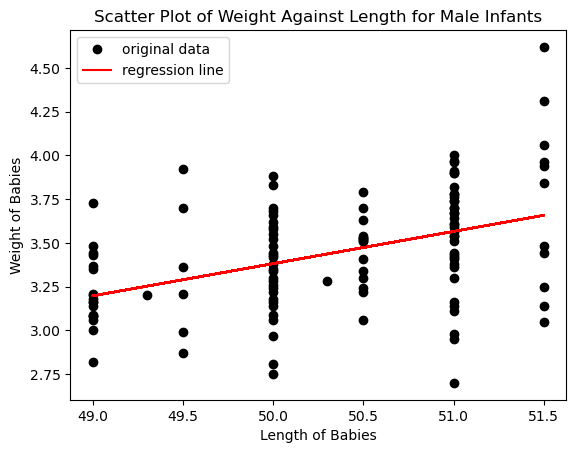

Coefficient of determination (R-squared) for female babies:
R-squared: 0.0307


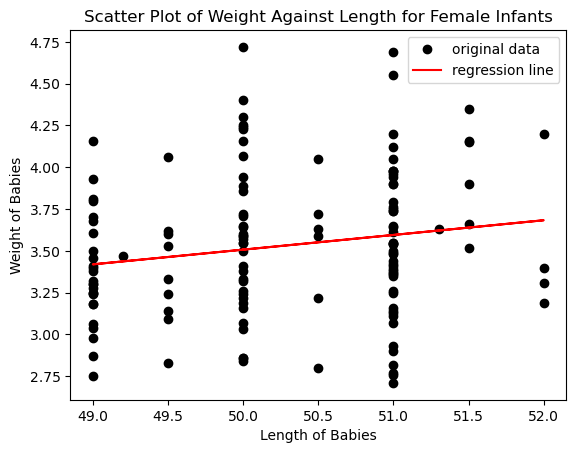

In [100]:
from scipy.stats import spearmanr, linregress
import matplotlib.pyplot as plt

# filter male and female babies into two seperate data frames
df_male = df[df['Gender'] == 'Male']
df_female = df[df['Gender'] == 'Female']

# Perform Spearman's rank correlation test - spearman is perfomes instead of pearson due to the non normal nature of the length data
corr_male2, p_value_male = spearmanr(df_male['Weight of Babies'], df_male['Length of Babies'])
corr_female2, p_value_female = spearmanr(df_female['Weight of Babies'], df_female['Length of Babies'])

# Print the Spearman correlation result for males
print(f"Spearman Correlation between Weight and Length in Males: {corr_male2:.3f}")
print(f"P-value: {p_value_male:.3f}")

# check if the correlation is statistically significant for males (p-value < 0.05)
if p_value_male < 0.05:
    print("The correlation is statistically significant at the 5% level.")
else:
    print("The correlation is not statistically significant.")
    
# Print the Spearman correlation result for females
print(f"Spearman Correlation between Weight and Length in Females: {corr_female2:.3f}")
print(f"P-value for Females: {p_value_female:.3f}")

# Check if the correlation is statistically significant for females (p-value < 0.05)
if p_value_female < 0.05:
    print("The correlation is statistically significant in females at the 5% level.")
else:
    print("The correlation is not statistically significant in females.")

print('Analyzing regression...\n')

# regression analysis for male babies: Predicting weight based on length
x = df_male['Length of Babies']
y = df_male['Weight of Babies']

# calculate the regression line (slope and intercept) using `linregress`
m_res = stats.mstats.linregress(x, y)
print('Coefficient of determination (R-squared) for male babies:')
print(f"R-squared: {m_res.rvalue**2:.4f}")

#create a scatter plot with the original data and the regression line for males
plt.plot(x, y, 'o', color='black', label= "original data")
plt.plot(x, m_res.intercept + m_res.slope*x, 'r', label='regression line')
plt.xlabel('Length of Babies')
plt.ylabel('Weight of Babies')
plt.title('Scatter Plot of Weight Against Length for Male Infants')
plt.legend()
plt.show()

# regression analysis for female babies: Predicting weight based on length
x1 = df_female['Length of Babies']
y1 = df_female['Weight of Babies']

# calculate the regression line (slope and intercept) using `linregress`
m_res = stats.mstats.linregress(x1, y1)

# print the coefficient of determination (R-squared) for the female babies
print('Coefficient of determination (R-squared) for female babies:')
print(f"R-squared: {m_res.rvalue**2:.4f}")

#create a scatter plot with the original data and the regression line for females
plt.plot(x1, y1, 'o', color='black', label= "original data")
plt.plot(x1, m_res.intercept + m_res.slope*x1, 'r', label='regression line')
plt.xlabel('Length of Babies')
plt.ylabel('Weight of Babies')
plt.legend()
plt.title('Scatter Plot of Weight Against Length for Female Infants')
plt.show()


<p style="font-family: Tahoma; font-weight: bold; font-size: 16px;"> According to the results:
    
Males showed a moderate positive relationship between length and weight, while females showed a weaker one. Length explained more of the variation in weight for males (19%) than for females (3.1%).
</p> 